In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df = pd.read_csv("student_grades.csv")
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [10]:
df.shape

(104, 5)

In [11]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [13]:
# ----------------------------------------------------------------------------------------------------------------------

Takeaways:

    exam1 has 1 null value (RangeIndex-exam1)
    exam1 should likely be of type int64 once the null value is addressed
    there is likely an odd value in exam3, as it should be of type int64 but was read in as an object. We need to find that value.
    given that there are limited attributes and limited observations with missing values, dropping the observations with missing values is probably a good way to go here.


In [14]:
# ----------------------------------------------------------------------------------------------------------------------

In [15]:
print(df.isnull().sum())

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64


In [16]:
print(df.columns[df.isnull().any()])

Index(['exam1'], dtype='object')


In [17]:
df.exam3.value_counts(sort=True, ascending=True)

       1
95     8
87     8
86     8
79     8
85     8
94     8
70     8
75    15
96    16
78    16
Name: exam3, dtype: int64

In [18]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB



    drop all observations with missing values
    update the data types to int


In [20]:
df = df.dropna().astype('int')

You may want to fill your missing values with a value instead of dropping the rows. One way to do that is to apply the method fillna() to your dataframe. df.fillna()

When running describe(), we should now see exam3 listed since we have converted it to a numeric type.

In [21]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


Visualize Distribution

Plot histograms &/or boxplots to see the distribution, skewness, outliers, and unit scales.
matplotlib.pyplot

Here we'll loop through each of the numeric columns of interest, and show the distribution of each on a separate subplot.

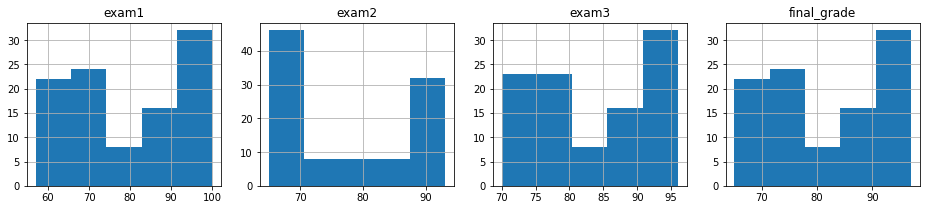

In [22]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

seaborn.boxplot

seaborn.boxplot will default to plotting all the numeric variables if we don't specify specific x and y values. 

<AxesSubplot:>

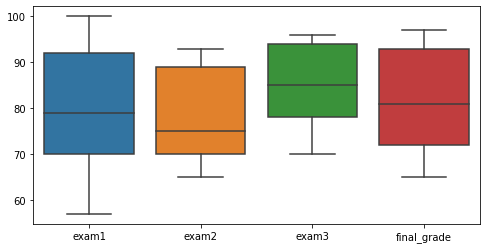

In [23]:
# we don't want to plot the `student_id` column.
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))


Pipeline Function

We finalize these steps (acquire & prep) by writing a function that will reproduce the dataframe with the necessary changes.

In [24]:
def wrangle_grades():
    grades = pd.read_csv("data/student_grades.csv")
    grades.drop(columns='student_id', inplace=True)
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

In [25]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [27]:
from pydataset import data
df = data('tips')

In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
df[['total_bill', "tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [38]:
smoker = df[df.smoker == "Yes"]

In [37]:
nonsmoker = df[df.smoker == "No"]

In [41]:
nonsmoker[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.822183
tip,0.822183,1.000000


In [42]:
smoker[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.488218
tip,0.488218,1.000000


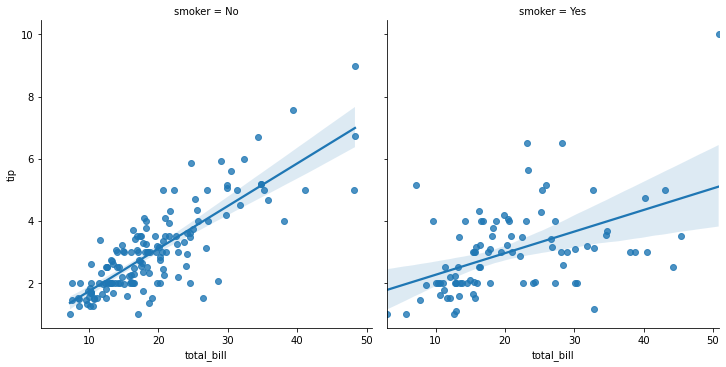

In [47]:
sns.lmplot(x = 'total_bill', y = 'tip', data = df, col = 'smoker')

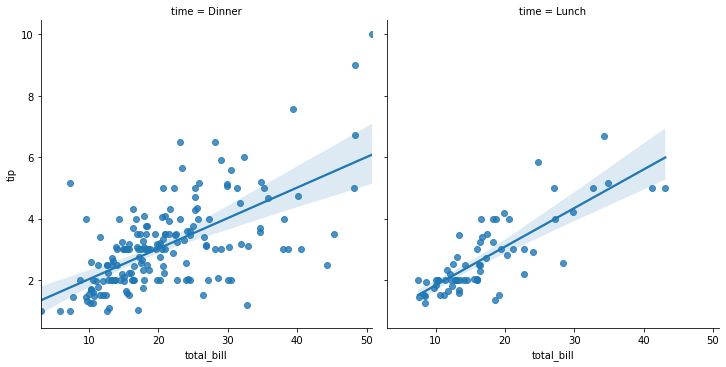

In [48]:
sns.lmplot(x = 'total_bill', y = 'tip', data = df, col = 'time')